Môn: DS105-Phân tích và trực quan dữ liệu

Nhóm: 21

MSSV: 21522665

Tên: Nguyễn Hồng Cát Thy

Tên đề tài: Phân tích và dự đoán nhồi máu cơ tim

Nguồn bộ dữ liệu: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

# **Import các thư viện cần thiết **

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/ds105/data

Mounted at /content/drive
/content/drive/My Drive/ds105/data


# **Mô tả bộ dữ liệu**

In [3]:
raw_data=pd.read_csv("/content/drive/My Drive/ds105/data/heart.csv")

In [4]:
data=raw_data.copy()
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Kích thước bộ dữ liệu**

In [5]:
data.shape

(303, 14)

**Thông tin bộ dữ liệu**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Các giá trị thiếu của bộ dữ liệu**

In [ ]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
age,0,0.0
sex,0,0.0
cp,0,0.0
trtbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalachh,0,0.0
exng,0,0.0
oldpeak,0,0.0


bộ dữ liệu không có giá trị thiếu

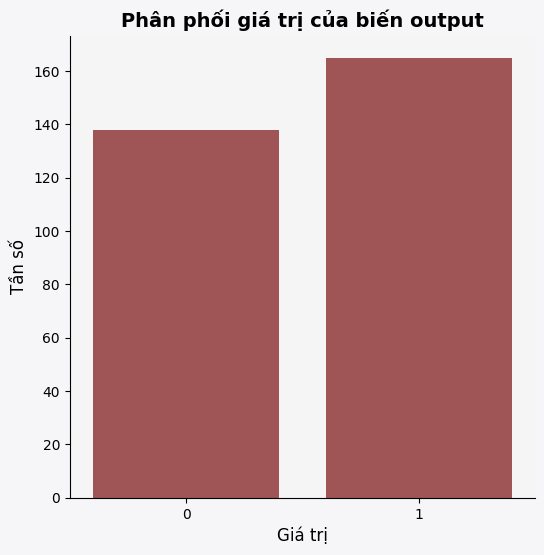

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.patch.set_facecolor('#f6f5f7')

# Vẽ biểu đồ phân phối cho biến output
sns.countplot(
    ax=ax,
    x=data['output'],
    color='darkred',
    alpha=0.7
)
ax.set_title('Phân phối giá trị của biến output', fontweight='bold', fontsize=14)
ax.set_xlabel('Giá trị', fontsize=12)
ax.set_ylabel('Tần số', fontsize=12)
ax.set_facecolor('#f6f5f5')

# Tắt đường viền top và right
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Hiển thị biểu đồ
plt.show()

**Tương quan giữa các biến**

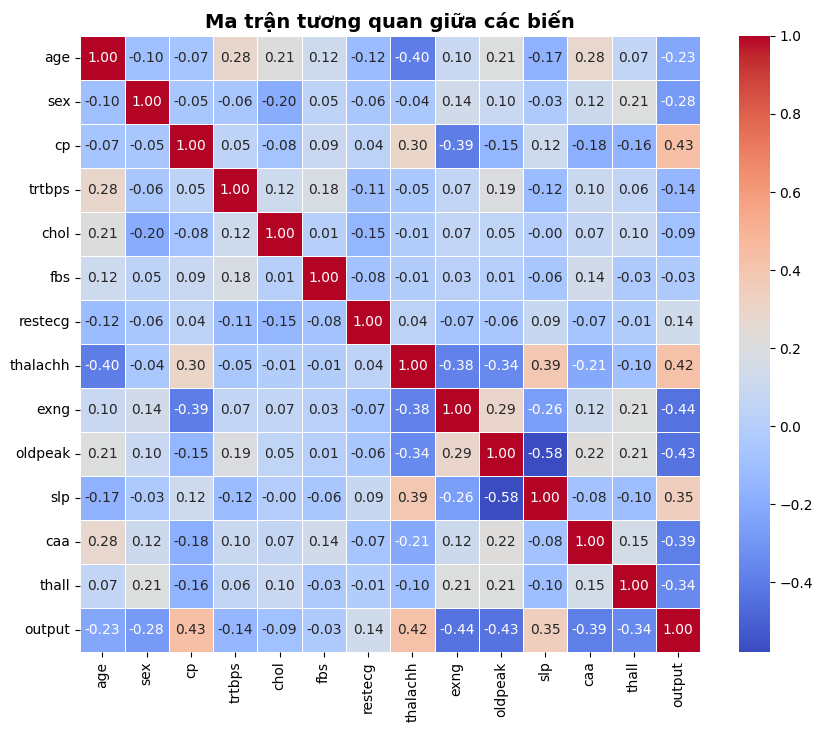

In [79]:
# Tính toán ma trận tương quan
correlation_matrix = data.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến', fontsize=14, fontweight='bold')
plt.show()


**Phân loại dữ liệu thành các đặc trưng**

In [73]:
data_numerical = data[['age','trtbps','chol','thalachh','oldpeak']]
data_categorical = data[['sex','cp','fbs','restecg','exng','caa','thall','output']]

# **Phân tích các biến**

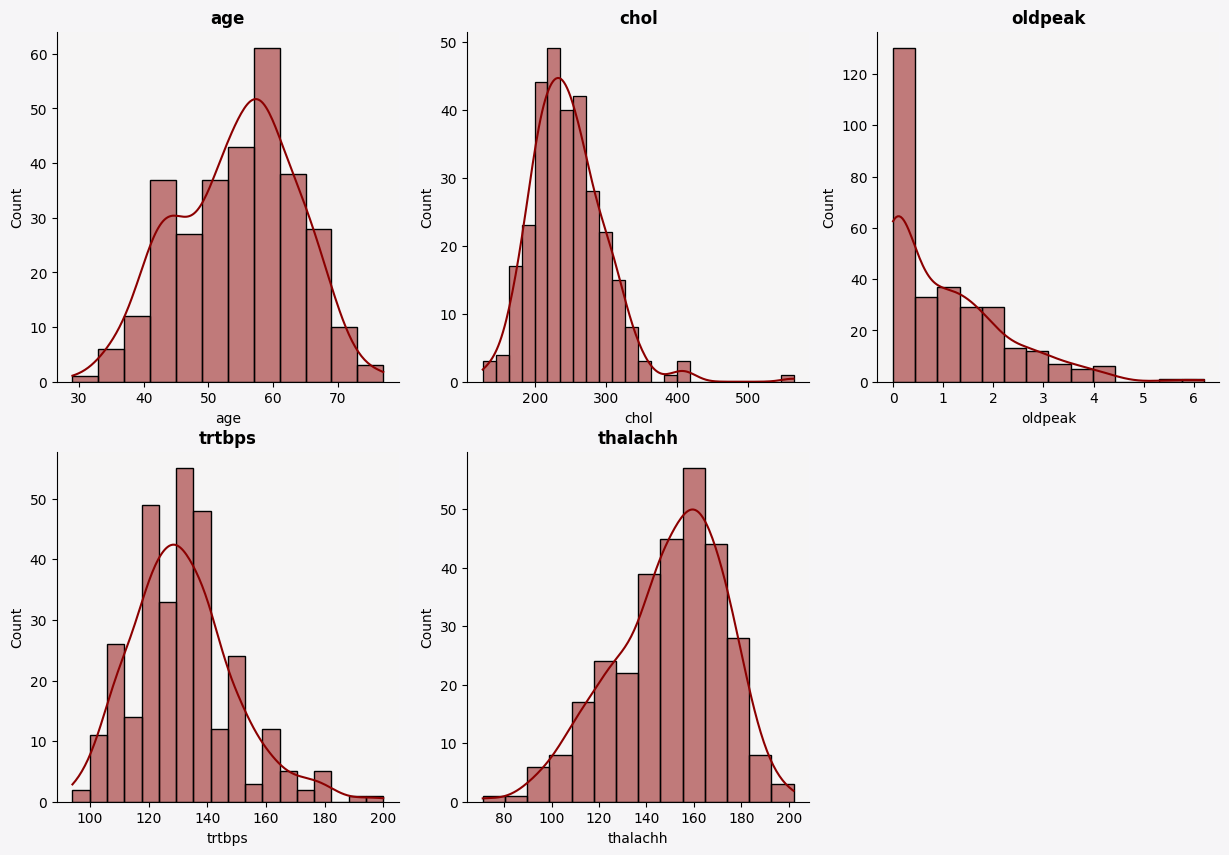

In [31]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
fig.patch.set_facecolor('#f6f5f7')
for i,idx in enumerate(data_numerical.columns):
    sns.histplot(ax=ax[i%2,i//2],x=data_numerical[idx],color='darkred',kde=True,alpha=0.5)
    ax[i%2,i//2].set_title(idx,fontweight='bold')
    ax[i%2,i//2].set_facecolor('#f6f5f5')
    for z in ["top","right"]:
        ax[i%2,i//2].spines[z].set_visible(False)
ax[1,2].set_visible(False)

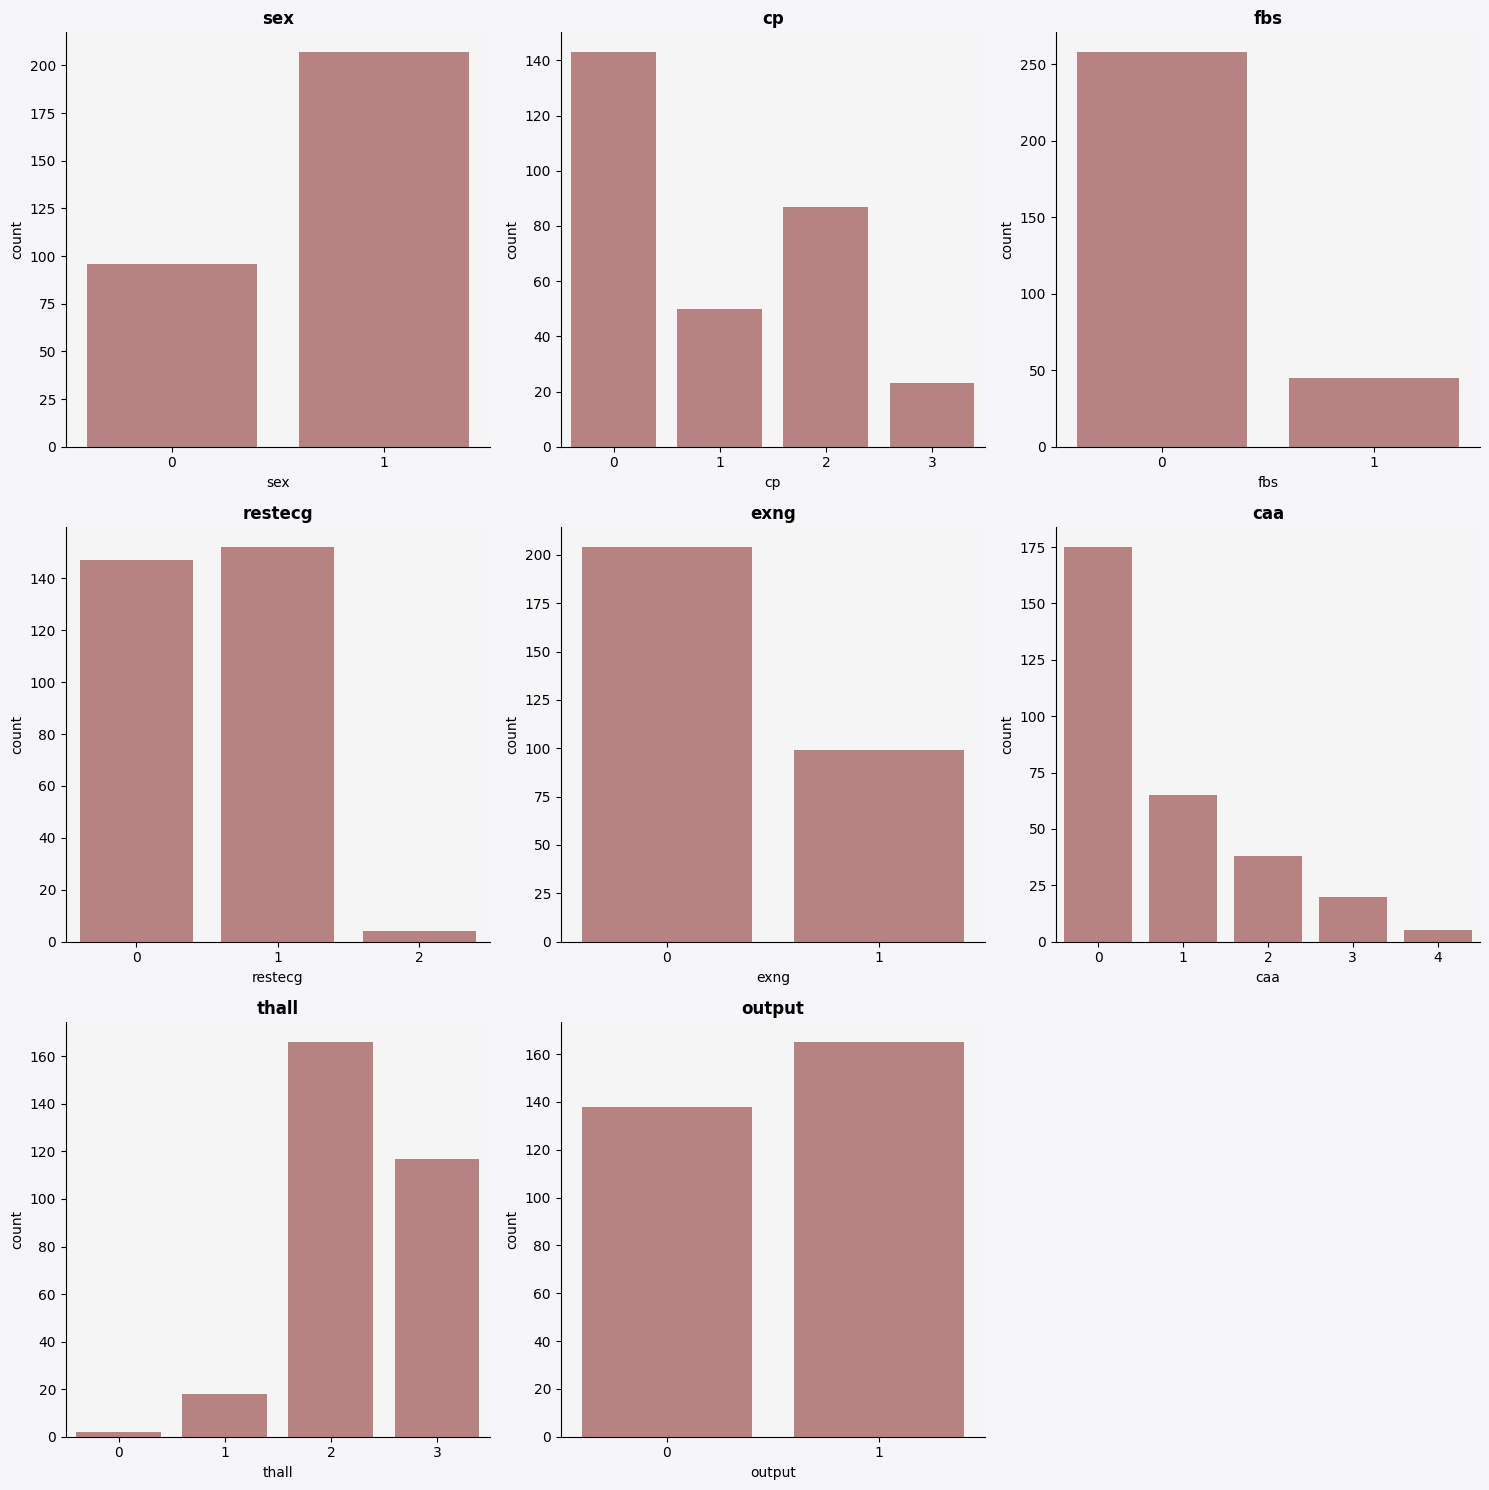

In [48]:
n = len(data_categorical.columns)  # Số lượng các biến phân loại

# Tính toán số hàng và số cột cho grid
ncols = 3
nrows = (n + ncols - 1) // ncols  # Tính số hàng cần thiết

fig, ax = plt.subplots(nrows, ncols, figsize=(15, nrows*5))
fig.patch.set_facecolor('#f6f5f7')

# Duyệt qua các cột trong data_categorical và vẽ biểu đồ countplot
for i, idx in enumerate(data_categorical.columns):
    ax_idx = ax[i // ncols, i % ncols]  # Tính toán vị trí của subplot trong grid
    sns.countplot(ax=ax_idx, x=data_categorical[idx], color='darkred', alpha=0.5)
    ax_idx.set_title(idx, fontweight='bold')
    ax_idx.set_facecolor('#f6f5f5')
    for z in ["top", "right"]:
        ax_idx.spines[z].set_visible(False)

# Ẩn các subplot không sử dụng nếu số lượng biến phân loại ít hơn ô lưới
for j in range(n, nrows * ncols):
    ax[j // ncols, j % ncols].set_visible(False)

plt.tight_layout()
plt.show()

**Phân tích các biến số liên tục với biến mục tiêu**

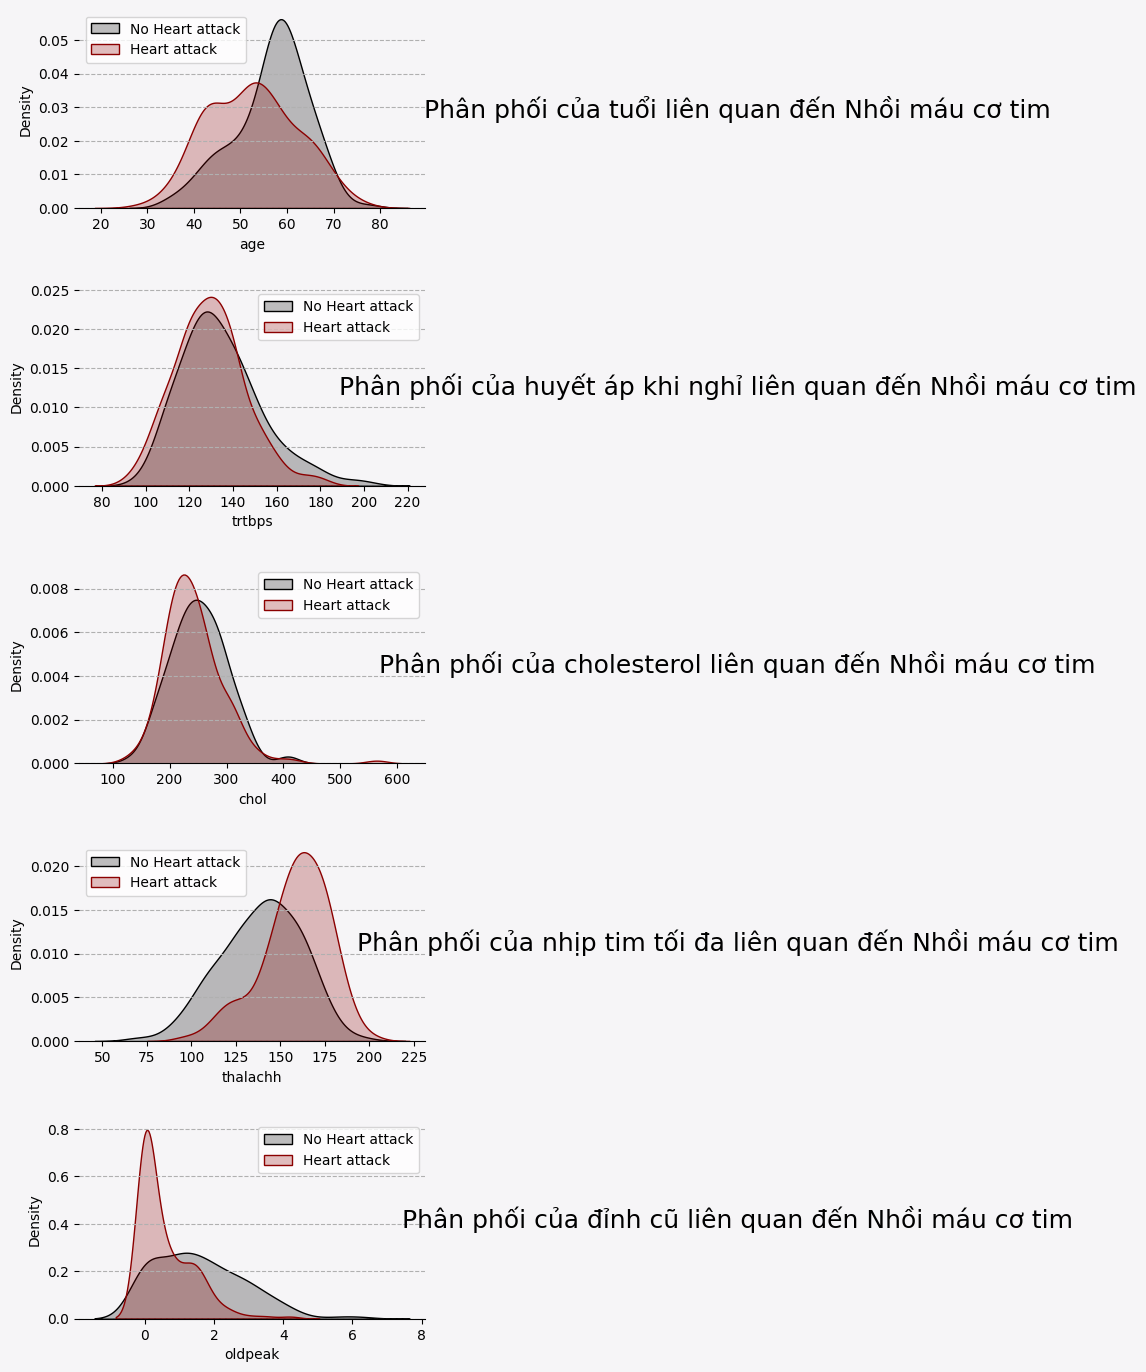

In [32]:
fig = plt.figure(figsize=(17,17))
gs = fig.add_gridspec(5,3)
gs.update(wspace=0.4, hspace=0.4)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.kdeplot(ax=ax0,x=data.loc[data['output']==0]['age'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax0,x=data.loc[data['output']==1]['age'],color='darkred',label='Heart attack',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

#ax1
ax1.text(0.5,0.5,'Phân phối của tuổi liên quan đến Nhồi máu cơ tim',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax2
sns.kdeplot(ax=ax2,x=data.loc[data['output']==0]['trtbps'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax2,x=data.loc[data['output']==1]['trtbps'],color='darkred',label='Heart attack',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')
#ax3
ax3.text(0.5,0.5,'Phân phối của huyết áp khi nghỉ liên quan đến Nhồi máu cơ tim',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax4
sns.kdeplot(ax=ax4,x=data.loc[data['output']==0]['chol'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax4,x=data.loc[data['output']==1]['chol'],color='darkred',label='Heart attack',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')
#ax5
ax5.text(0.5,0.5,'Phân phối của cholesterol liên quan đến Nhồi máu cơ tim',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax6
sns.kdeplot(ax=ax6,x=data.loc[data['output']==0]['thalachh'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax6,x=data.loc[data['output']==1]['thalachh'],color='darkred',label='Heart attack',shade=True)
ax6.legend(loc = 'upper left')
ax6.grid(linestyle='--', axis='y')
#ax7
ax7.text(0.5,0.5,'Phân phối của nhịp tim tối đa liên quan đến Nhồi máu cơ tim',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax8
sns.kdeplot(ax=ax8,x=data.loc[data['output']==0]['oldpeak'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax8,x=data.loc[data['output']==1]['oldpeak'],color='darkred',label='Heart attack',shade=True)
ax8.legend(loc = 'upper right')
ax8.grid(linestyle='--', axis='y')
#ax9
ax9.text(0.5,0.5,'Phân phối của đỉnh cũ liên quan đến Nhồi máu cơ tim',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

axes1=[ax1,ax3,ax5,ax7,ax9]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

**Biểu đồ tương quan cho các biến số liên tục**

Text(-1.7, 1.1, 'Biểu đồ tương quan cho các biến số liên tục')

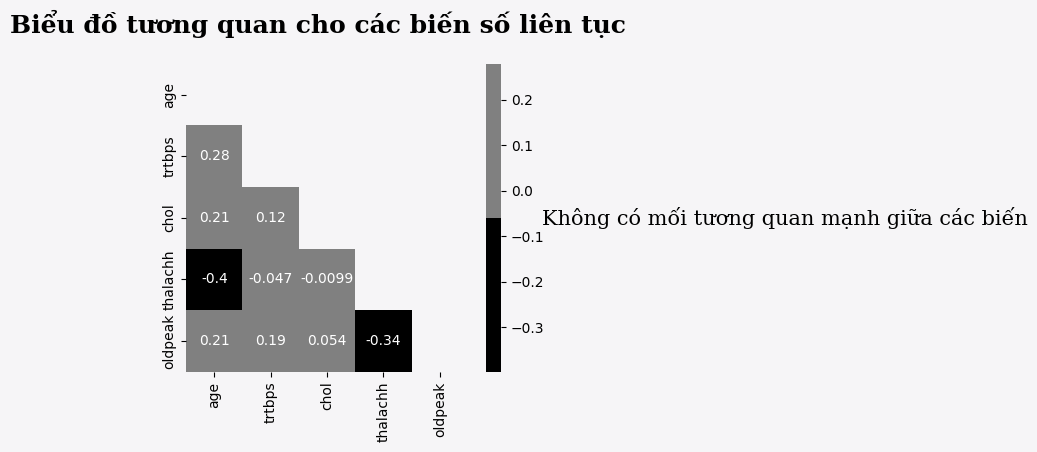

In [ ]:
fig=plt.figure(figsize=(10,4),dpi=100)
gs=fig.add_gridspec(1,2)
# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'

for i in axes:
    i.set_facecolor(background_color)

fig.patch.set_facecolor(background_color)

matrix = np.triu(data_numerical.corr())
colors=['black','grey']
sns.heatmap(ax=ax0,data=data_numerical.corr(), annot=True, mask=matrix,cmap=colors)
ax1.text(0.5,0.5,'Không có mối tương quan mạnh giữa các biến',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Biểu đồ tương quan cho các biến số liên tục',fontsize=18,fontweight='bold',fontfamily='serif')

Quan sát:

* Cholesterol (Chol) và Oldpeak (đỉnh cũ) có mức độ tương quan cao nhất giữa các đặc trưng.

* Có mối tương quan âm giữa cholesterol và thalach (nhịp tim tối đa đạt được), giữa tuổi (age) và thalach, cũng như giữa thalach và old peak. Do đó, chúng ta có thể bỏ qua khả năng xảy ra đa cộng tuyến (multicollinearity).

**Phân tích Đơn biến của Các Biến Phân loại**

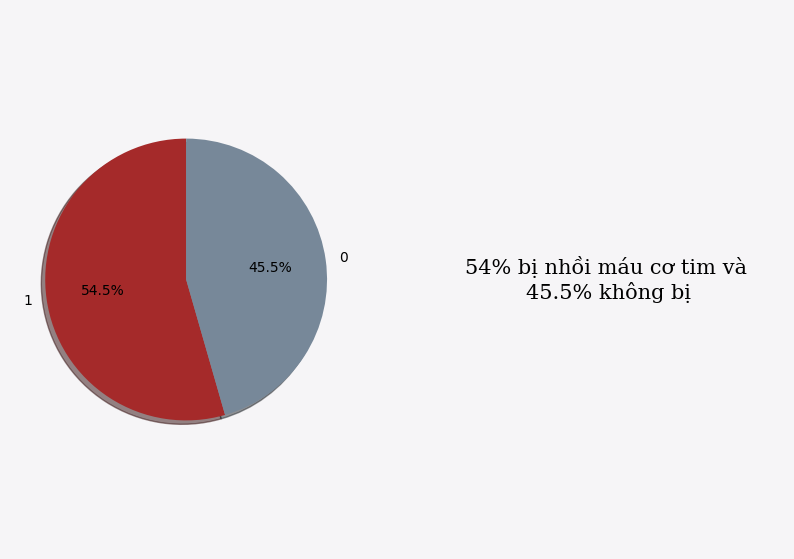

In [ ]:
colors=['brown','lightslategrey']
fig=plt.figure(figsize=(10,7))
gs=fig.add_gridspec(1,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
fig.patch.set_facecolor(background_color)
labels=data_categorical['output'].value_counts().index
values=data_categorical['output'].value_counts()

ax0.pie(values,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 90)

ax1.text(0.5,0.5,'54% bị nhồi máu cơ tim và \n45.5% không bị',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
ax1.tick_params(left=False, bottom=False)

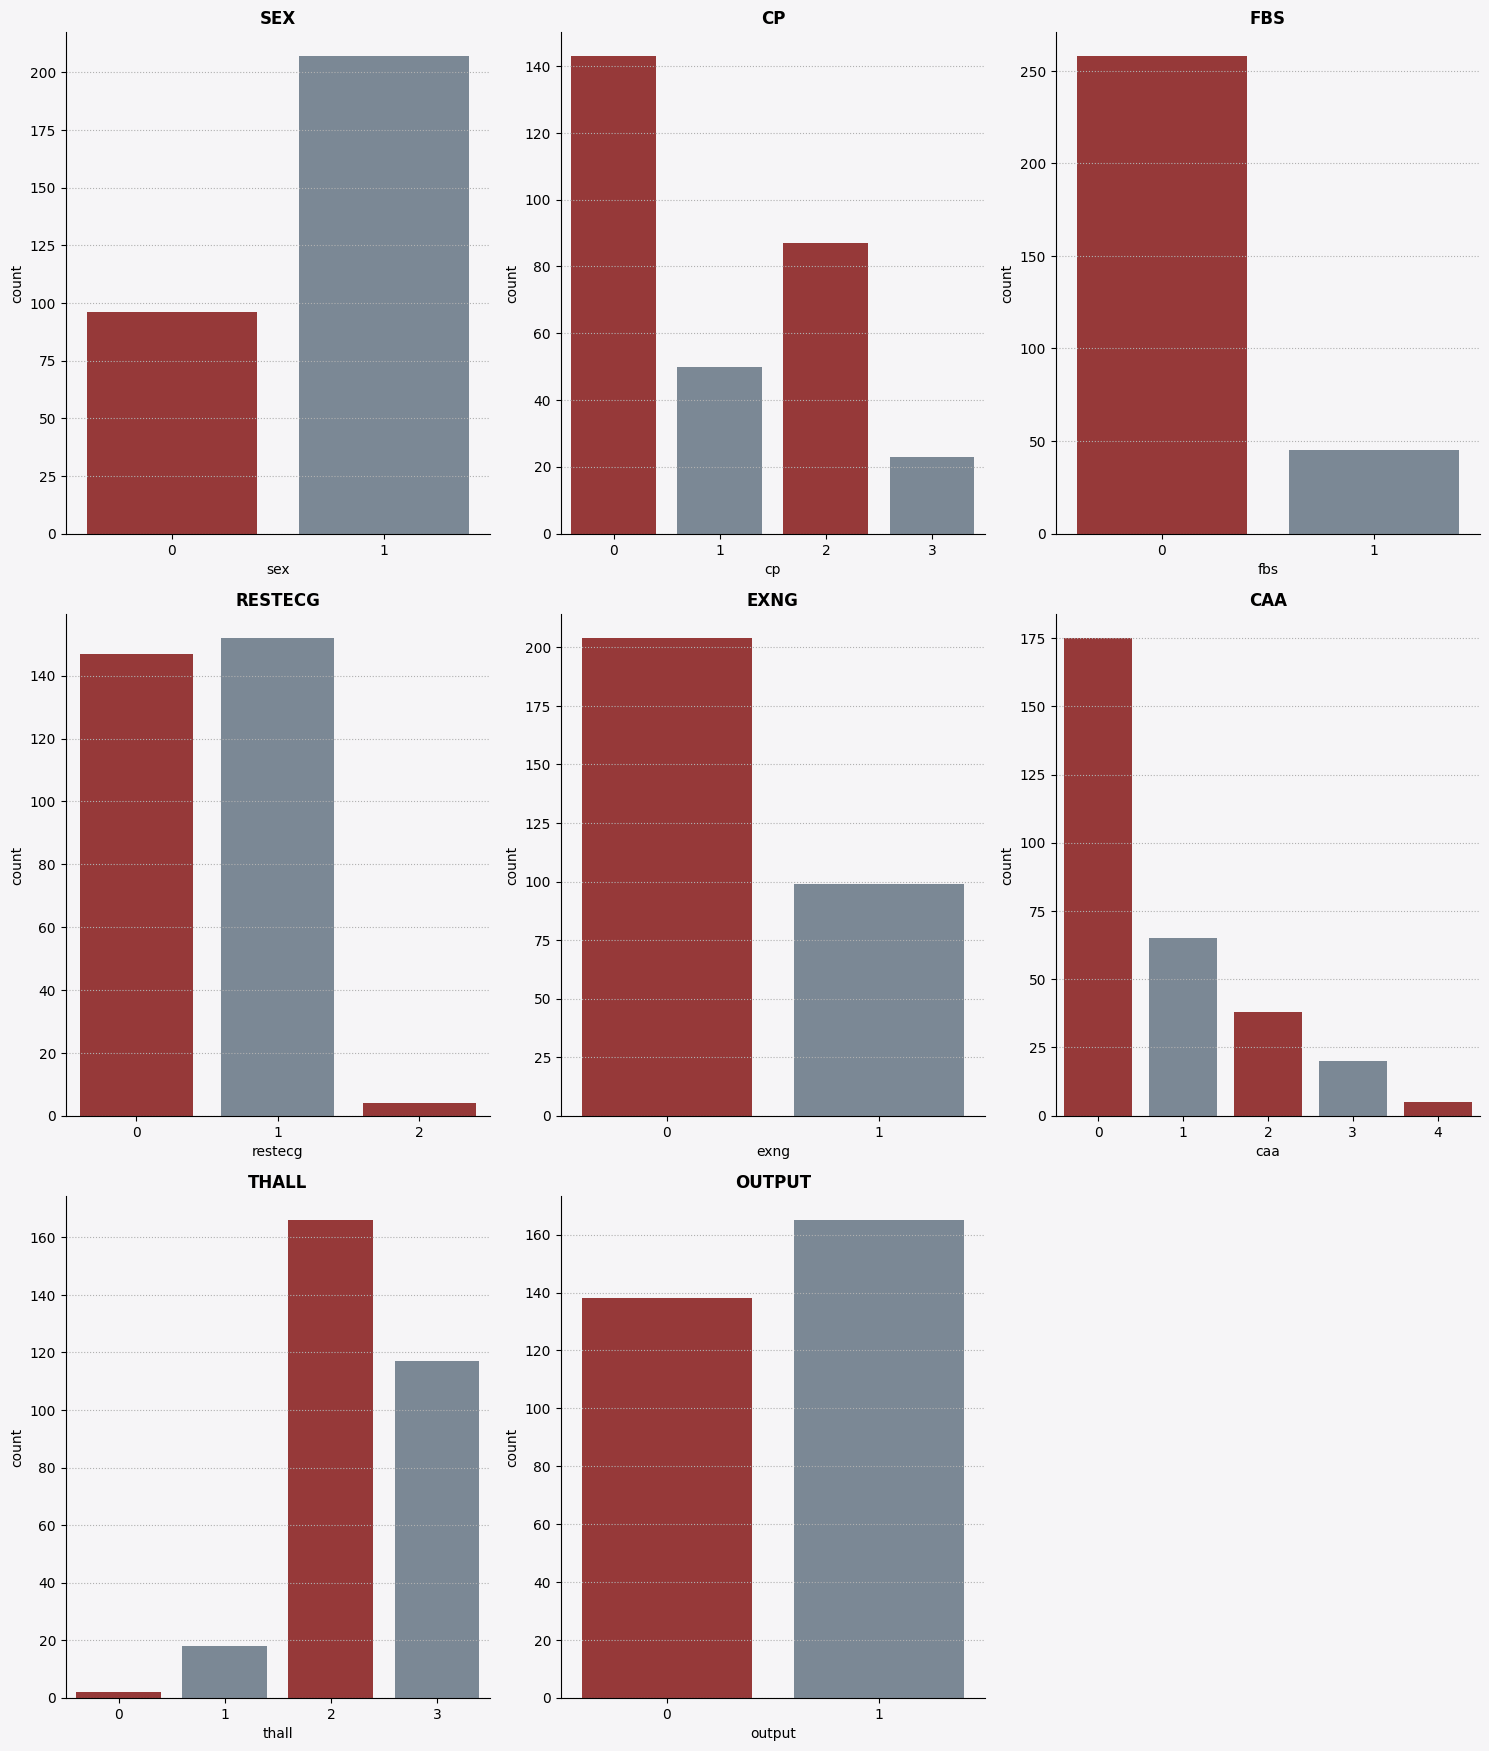

In [ ]:
colors = ['brown', 'lightslategrey']
fig = plt.figure(figsize=(15, 23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)


for indx, val in enumerate(data_categorical.columns):
    ax = plt.subplot(4, 3, indx + 1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(), fontweight='bold')

    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)

    ax.grid(linestyle=':', axis='y')

    sns.countplot(x=data_categorical[val], palette=colors, ax=ax)

plt.tight_layout()
plt.show()

Quan sát:

* Giới tính (Sex): Số lượng nam giới (male = 1) nhiều hơn nhiều so với số lượng nữ giới (female = 0) trong dữ liệu.

* Đau ngực (CP): Số người bị đau ngực loại 0 (đau ngực điển hình) nhiều hơn hẳn so với các nhóm khác. Loại đau ngực 3 (không có triệu chứng) có số lượng ít nhất.

* FBS: Số người có mức đường huyết lúc đói (fasting blood sugar) < 120 nhiều hơn so với số người có mức đường huyết > 120.

* RESECG: Số lượng người có kết quả 0 (bình thường) và 1 (có bất thường sóng ST-T) gần như bằng nhau. Điều này sẽ hữu ích cho việc dự đoán nhồi máu cơ tim. Loại 2 gần như không đáng kể.

* EXANG: Số người không có triệu chứng đau thắt ngực (0) gấp gần hai lần số người có triệu chứng (1).

* CA: Số người có mạch máu 0 chiếm phần lớn trong dữ liệu. Nhiều trường hợp nhồi máu cơ tim hơn được quan sát khi CA = 0 (phân tích trước đó).

* THAL: Số người có thal 2 nhiều hơn. Không có thông tin nào được cung cấp về điều này (có thể không đưa vào dự đoán).

**Phân tích với output**

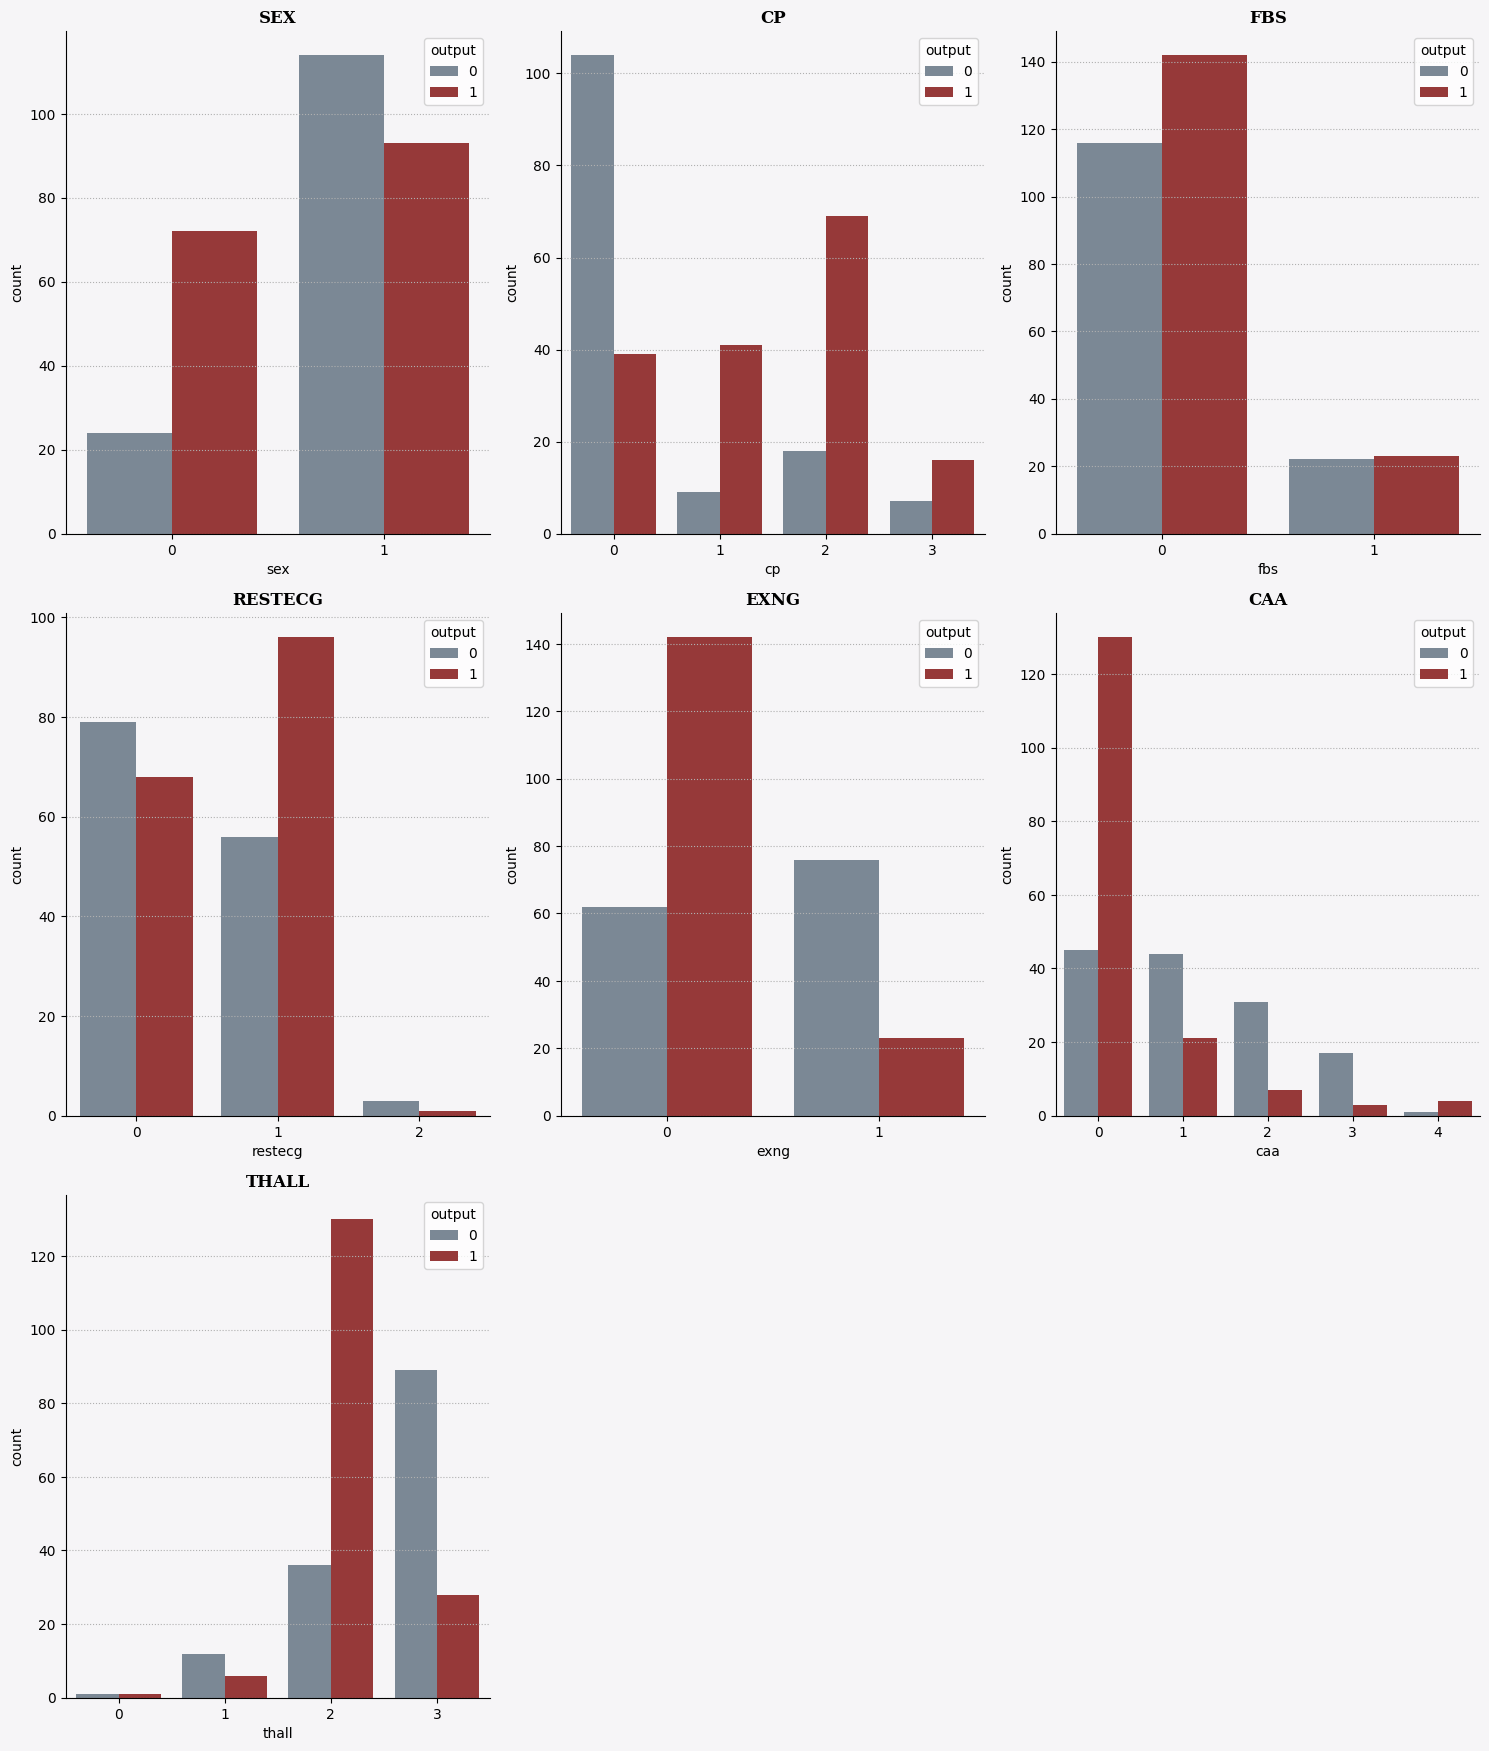

In [ ]:
data_cat = data_categorical[['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall']]
fig = plt.figure(figsize=(15, 23))

colors = ['lightslategrey', 'brown']
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)

for indx, val in enumerate(data_cat.columns):
    ax = plt.subplot(4, 3, indx + 1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(), fontweight='bold', fontfamily='serif')

    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)

    ax.grid(linestyle=':', axis='y')

    sns.countplot(x=data_cat[val], palette=colors, hue=data['output'], ax=ax)

plt.tight_layout()
plt.show()

Quan sát:

* Giới tính (Sex): Nam giới có nguy cơ bị nhồi máu cơ tim nhiều hơn nữ giới.

* Đau ngực (CP): Những người bị đau ngực loại 2 (đau ngực không điển hình) có nguy cơ bị nhồi máu cơ tim cao hơn so với bất kỳ loại đau ngực nào khác (chỉ có một vài người bị đau loại 2 không bị nhồi máu).

* Đường huyết lúc đói (FBS): Những người có mức đường huyết lúc đói < 120 có nhiều khả năng gặp phải nhồi máu cơ tim hơn. Cần xem xét lại điều này.

* Kết quả điện tâm đồ (RESTECG): Những người có kết quả điện tâm đồ loại 1 (có bất thường sóng ST-T) gặp phải nhiều trường hợp nhồi máu cơ tim nhất (điều này là dự đoán trước). Một cách bất ngờ, những người có kết quả điện tâm đồ bình thường cũng gặp phải nhiều trường hợp nhồi máu. Loại 2 có thể được bỏ qua.

* Đau thắt ngực do tập thể dục (EXANG): Những người bị đau thắt ngực do tập thể dục có nguy cơ bị nhồi máu cơ tim cao hơn.

* Số lượng mạch máu chính (CA): Những người có số lượng mạch máu chính bằng 0 gặp phải nhiều trường hợp nhồi máu cơ tim nhất (điều này là dự đoán trước).

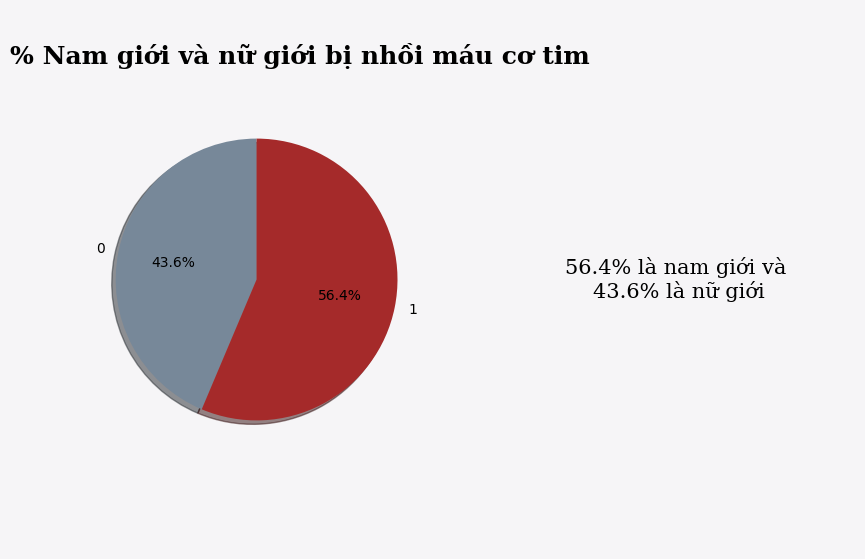

In [62]:
sum_target = data['output'].sum()
data_sex = pd.pivot_table(data=data[data['output']==1],index=data['sex'],values='output',aggfunc='count').reset_index()
data_sex['percentage'] = (data_sex['output']*100)/sum_target
colors=['lightslategrey','brown']
fig=plt.figure(figsize=(10,7))
gs=fig.add_gridspec(1,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
fig.patch.set_facecolor(background_color)
labels=data_sex['sex']
values=data_sex['percentage']
ax0.pie(values,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 90)

ax1.text(0.5,0.5,'56.4% là nam giới và \n43.6% là nữ giới',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
plt.text(-1.4,0.9,'% Nam giới và nữ giới bị nhồi máu cơ tim',fontsize=18,fontweight='bold',fontfamily='serif')
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
ax1.tick_params(left=False, bottom=False)

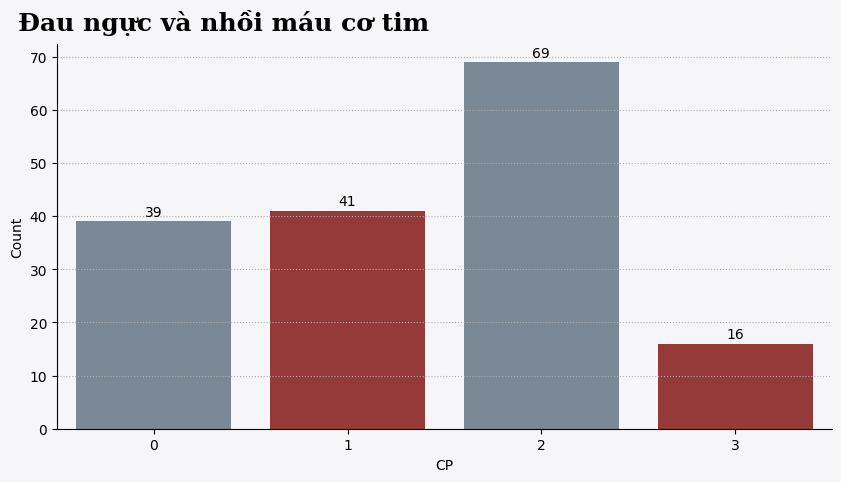

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,5))
backgroundcolor='#f6f5f7'
fig.patch.set_facecolor(background_color)
axes.set_facecolor(background_color)
data_cp = pd.pivot_table(data=data[data['output']==1],index=data['cp'],values='output',aggfunc='count').reset_index()
sns.barplot(ax=axes,x=data_cp['cp'],y=data_cp['output'],palette=colors)
for idx,val in enumerate(data_cp['output']):
    axes.text( idx,val+1, round(val, 1), horizontalalignment='center')
axes.grid(linestyle=':',axis='y')
axes.set_xlabel('CP')
axes.set_ylabel('Count')
plt.text(-0.7,75,'Đau ngực và nhồi máu cơ tim',fontsize=18,fontweight='bold',fontfamily='serif')

for i in ['top','right']:
    axes.spines[i].set_visible(False)


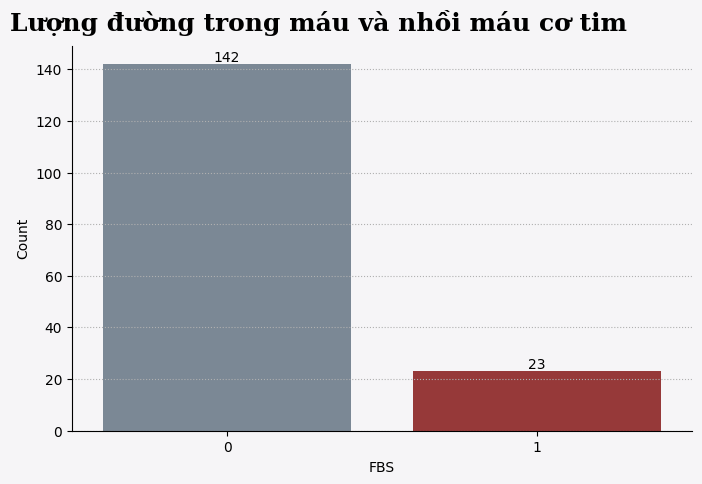

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(8,5))
backgroundcolor='#f6f5f7'
fig.patch.set_facecolor(background_color)
axes.set_facecolor(background_color)
data_fbs = pd.pivot_table(data=data[data['output']==1],index=data['fbs'],values='output',aggfunc='count').reset_index()
sns.barplot(ax=axes,x=data_fbs['fbs'],y=data_fbs['output'],palette=colors)
for idx,val in enumerate(data_fbs['output']):
    axes.text( idx,val+1, round(val, 1), horizontalalignment='center')
axes.grid(linestyle=':',axis='y')
axes.set_xlabel('FBS')
axes.set_ylabel('Count')
plt.text(-0.7,155,'Lượng đường trong máu và nhồi máu cơ tim',fontsize=18,fontweight='bold',fontfamily='serif')
for i in ['top','right']:
    axes.spines[i].set_visible(False)

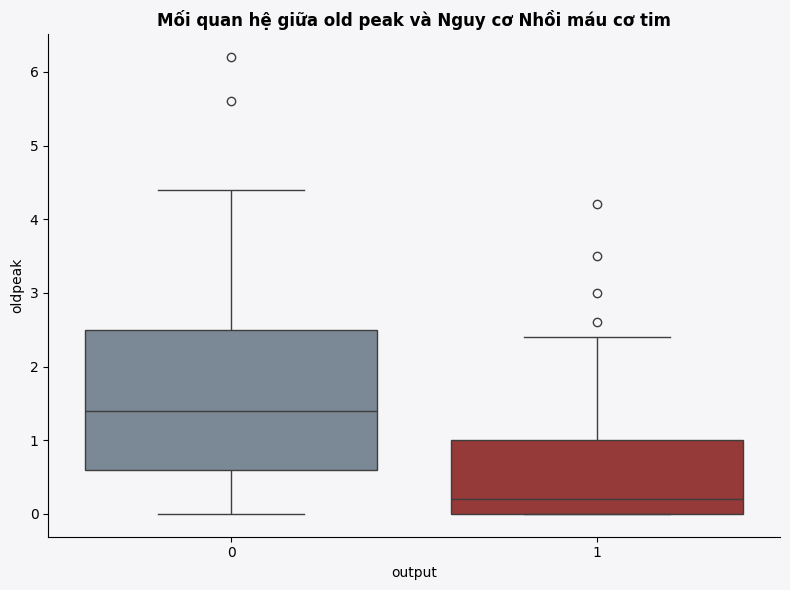

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.patch.set_facecolor('#f6f5f7')

sns.boxplot(ax=ax, x='output', y='oldpeak', data=data, palette=colors)
ax.set_title('Mối quan hệ giữa old peak và Nguy cơ Nhồi máu cơ tim', fontweight='bold')
ax.set_facecolor('#f6f5f7')
for z in ["top", "right"]:
    ax.spines[z].set_visible(False)

plt.tight_layout()


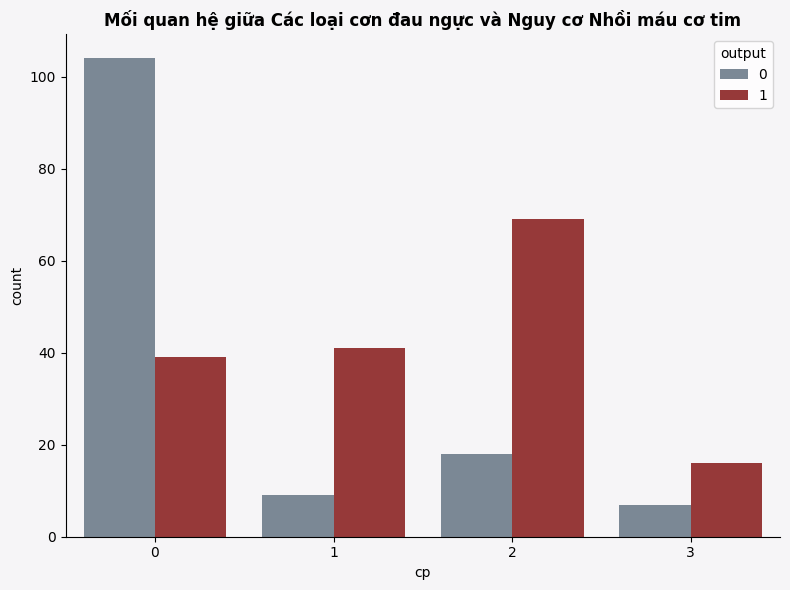

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.patch.set_facecolor('#f6f5f7')

sns.countplot(ax=ax, x='cp', hue='output', data=data, palette=colors)
ax.set_title('Mối quan hệ giữa Các loại cơn đau ngực và Nguy cơ Nhồi máu cơ tim', fontweight='bold')
ax.set_facecolor('#f6f5f7')
for z in ["top", "right"]:
    ax.spines[z].set_visible(False)

plt.tight_layout()


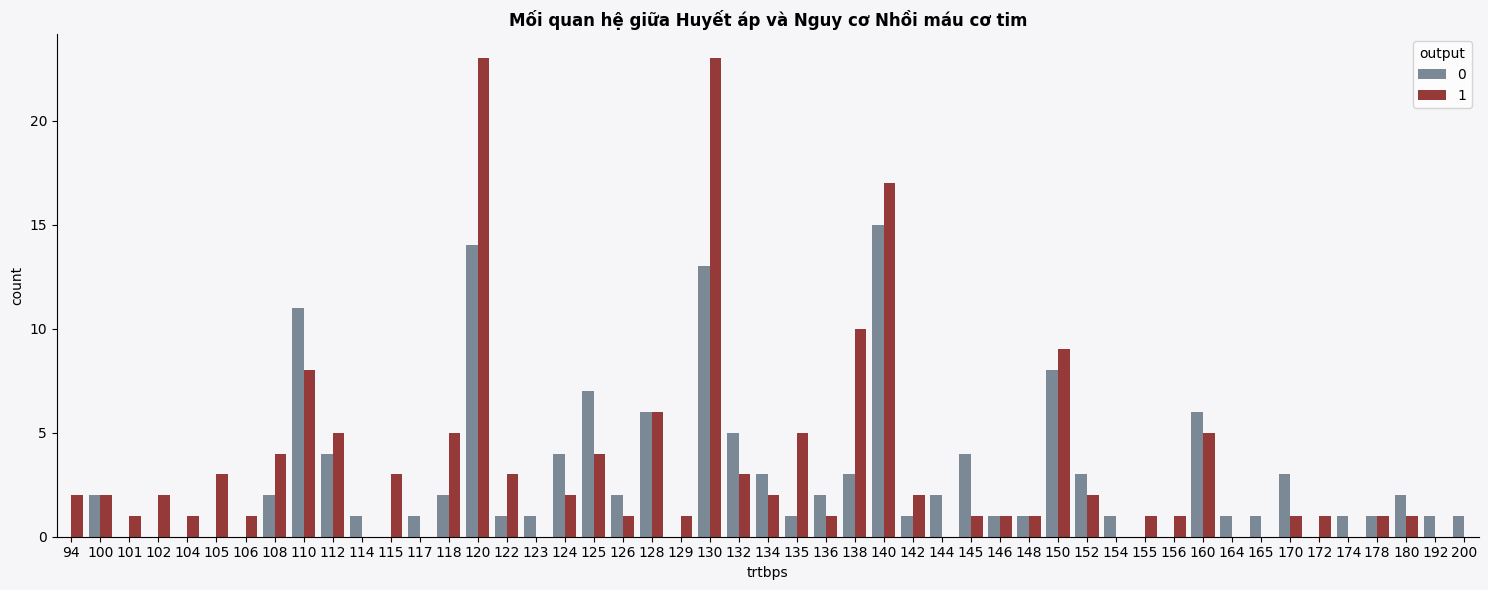

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
fig.patch.set_facecolor('#f6f5f7')

sns.countplot(ax=ax, x='trtbps', hue='output', data=data, palette=colors)
ax.set_title('Mối quan hệ giữa Huyết áp và Nguy cơ Nhồi máu cơ tim', fontweight='bold')
ax.set_facecolor('#f6f5f7')
for z in ["top", "right"]:
    ax.spines[z].set_visible(False)

plt.tight_layout()


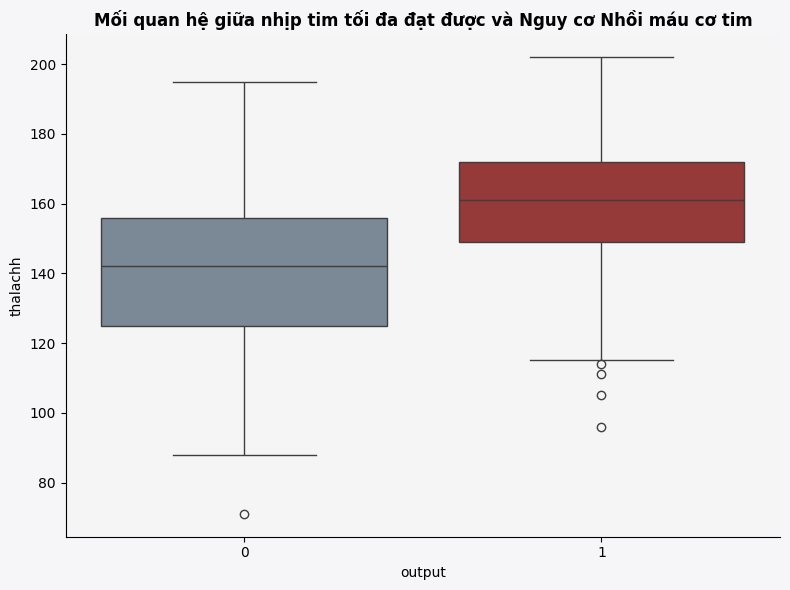

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.patch.set_facecolor('#f6f5f7')

sns.boxplot(ax=ax, x='output', y='thalachh', data=data, palette= colors)
ax.set_title('Mối quan hệ giữa nhịp tim tối đa đạt được và Nguy cơ Nhồi máu cơ tim', fontweight='bold')
ax.set_facecolor('#f6f5f5')
for z in ["top", "right"]:
    ax.spines[z].set_visible(False)

plt.tight_layout()


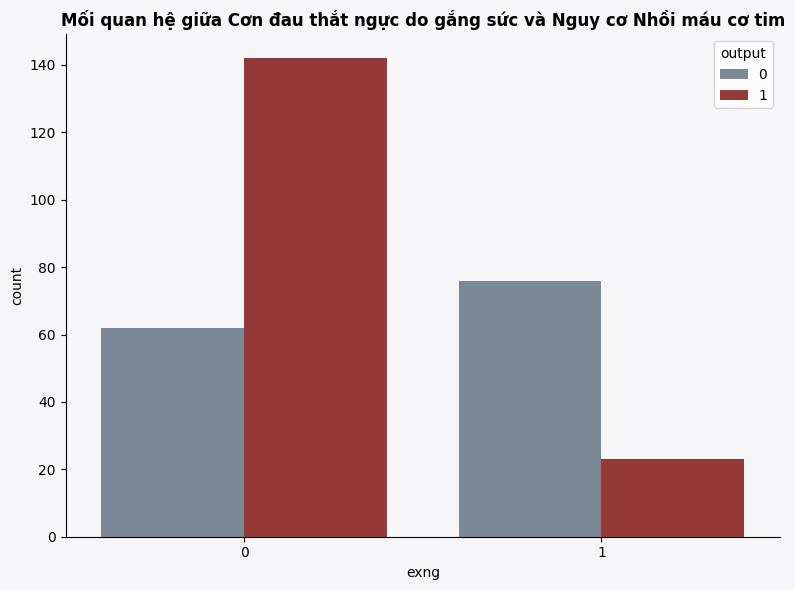

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.patch.set_facecolor('#f6f5f7')

sns.countplot(ax=ax, x='exng', hue='output', data=data, palette=colors)
ax.set_title('Mối quan hệ giữa Cơn đau thắt ngực do gắng sức và Nguy cơ Nhồi máu cơ tim', fontweight='bold')
ax.set_facecolor('#f6f5f7')
for z in ["top", "right"]:
    ax.spines[z].set_visible(False)

plt.tight_layout()


# **Tiền xử lí**

In [118]:
def handle_outliers_iqr_selected(df, columns_with_outliers):
    for col in columns_with_outliers:
        Q1 = df[col].quantile(0.25)  # Phân vị thứ 1 (25%)
        Q3 = df[col].quantile(0.75)  # Phân vị thứ 3 (75%)
        IQR = Q3 - Q1  # Tính IQR

        # Ngưỡng dưới và trên để phát hiện outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(f"Xử lý cột '{col}' - Lower: {lower_bound}, Upper: {upper_bound}")

        # Thay thế outliers bằng trung vị
        median_value = df[col].median()
        df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df

# Danh sách các cột đã phát hiện ngoại lai
columns_with_outliers = ['age', 'chol', 'trtbps', 'thalachh', 'oldpeak']

# Xử lý outliers cho các cột đã phát hiện
data_cleaned = handle_outliers_iqr_selected(data, columns_with_outliers)

# Hiển thị kết quả
data.head()

Xử lý cột 'age' - Lower: 27.25, Upper: 81.25
Xử lý cột 'chol' - Lower: 119.5, Upper: 363.5
Xử lý cột 'trtbps' - Lower: 90.0, Upper: 170.0
Xử lý cột 'thalachh' - Lower: 91.0, Upper: 211.0
Xử lý cột 'oldpeak' - Lower: -2.4000000000000004, Upper: 4.0


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [119]:
#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [120]:
#spliting data into X and y

X=data.drop(["output"],axis=1)
y=data["output"]

In [121]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

In [122]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)


# **Xây dựng mô hình dự đoán và kết quả đánh giá**

In [142]:
key = ['LogisticRegression','K Neighbors','SVC','Decision Tree','Random Forest','Gradient Boosting','XGB']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier()]
models = dict(zip(key,value))

In [143]:
accuracy =[]
recall =[]
precision =[]

**Accuracy**

In [144]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    accuracy.append(acc)
    print(f"{name}: {acc:.2%}")

LogisticRegression: 85.25%
K Neighbors: 78.69%
SVC: 80.33%
Decision Tree: 73.77%
Random Forest: 83.61%
Gradient Boosting: 73.77%
XGB: 81.97%


<Axes: >

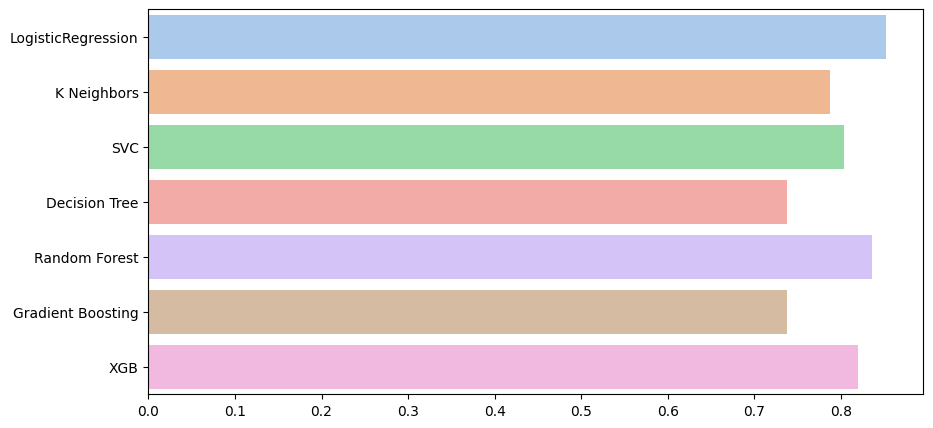

In [145]:
plt.figure(figsize = (10,5))
sns.barplot(x = accuracy, y = key, palette='pastel')

**Recall**

In [146]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    rec = recall_score(y_test, predict)
    recall.append(rec)
    print(f"{name}: {rec:.2%}")

LogisticRegression: 86.49%
K Neighbors: 81.08%
SVC: 78.38%
Decision Tree: 72.97%
Random Forest: 81.08%
Gradient Boosting: 70.27%
XGB: 78.38%


<Axes: >

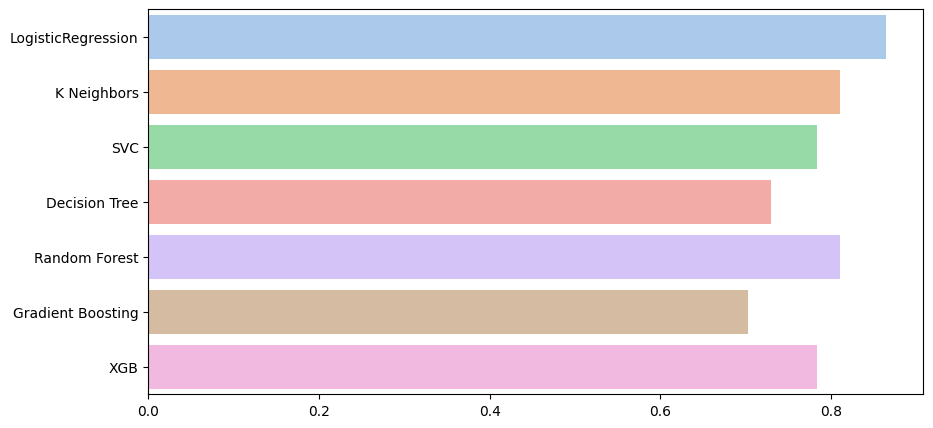

In [147]:
plt.figure(figsize = (10,5))
sns.barplot(x = recall, y = key, palette='pastel')

**Precision**

In [148]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    prec = precision_score(y_test, predict)
    precision.append(prec)
    print(f"{name}: {prec:.2%}")

LogisticRegression: 88.89%
K Neighbors: 83.33%
SVC: 87.88%
Decision Tree: 89.66%
Random Forest: 87.88%
Gradient Boosting: 83.87%
XGB: 90.62%


<Axes: >

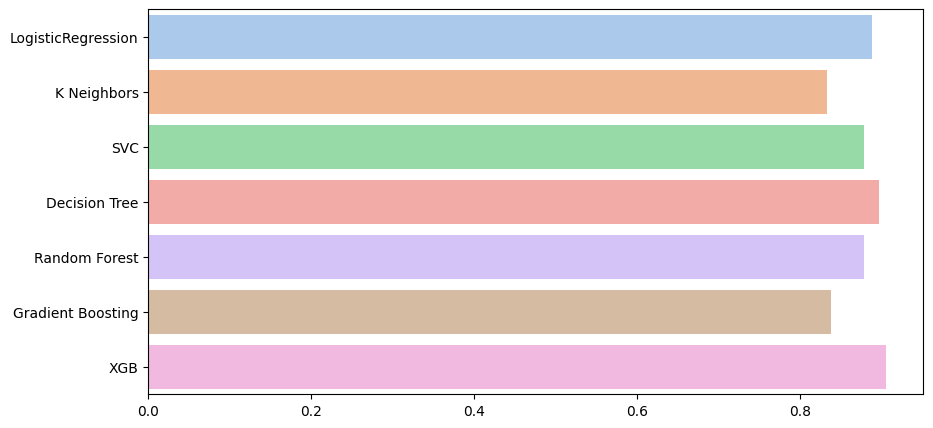

In [149]:
plt.figure(figsize = (10,5))
sns.barplot(x = precision, y = key, palette='pastel')